导包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

加载数据
- sklearn.datasets.fetch_olivetti_faces()  好利获得（意大利电信）公司的面部数据
    - data样本数据  (400, 4096)
    - target 目标数据 (400,)  共40人，每人10张图片
    - images 图片数据 (400, 64, 64)
> 注：第一次使用时会从网络下载到本地，4M左右大小，  网址：https://ndownloader.figshare.com/files/5976027 ，默认下载到用户的{home}路径下的scikit_learn_data目录中。

In [2]:
from sklearn.datasets import fetch_olivetti_faces

In [3]:
faces = fetch_olivetti_faces()

In [4]:
samples = faces.data
target = faces.target

In [5]:
samples.shape

(400, 4096)

In [6]:
faces.images.shape

(400, 64, 64)

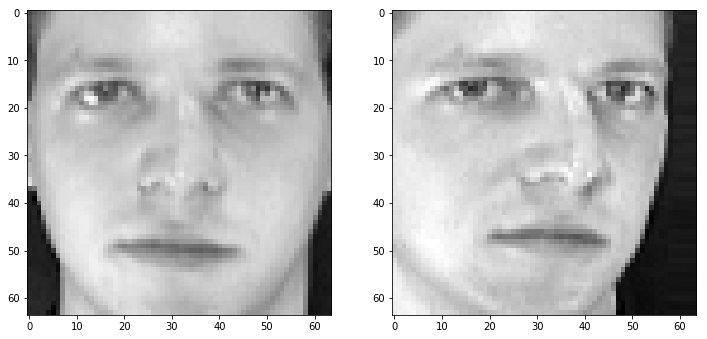

In [12]:
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
plt.imshow(faces.images[0], cmap='gray')

ax2 = plt.subplot(122)
plt.imshow(faces.images[1], cmap='gray')

plt.show()

In [10]:
target[9]

0

拆分数据
- 拆分每个人前8张照片的上半边脸和下半边脸 为训练数据
- 拆分每个人后2张照片的上半边脸和下半边脸 为 预测 数据
- i 人的索引（0-39）， j（0-9）每人的照片数 , 如第1人的第7张照片, index为 7
    - index = 10*i + j 
    
- 脸的照片是4096,即为(64, 64)
    - 上半边脸  up_face = face[:2048]
    - 下半边脸  bottom_face = face[2048:]

In [5]:
X_train, y_train = [], []  # 训练数据集
X_test, y_test = [], [] # 预测数据集

for i in range(40):  # 人数
    for j in range(10): # 照片数
        index = i*10 + j  # 每个人第j张图片的index索引
        face = samples[index]  # [4096]
        
        up_face = face[:2048]  # 上半脸
        bottom_face = face[2048:] # 下半脸
        
        if j < 8:  # 前8张图片
            X_train.append(up_face)
            y_train.append(bottom_face)
        else:
            X_test.append(up_face)
            y_test.append(bottom_face)

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)
display(X_train.shape, y_train.shape)

(320, 2048)

(320, 2048)

Knn Vs 线性 回归模型 训练与预测
- 从预测时间上看，岭回归效果最好，Lasso其次，最慢的就是knn
- 从训练时间上看，knn最快，岭回归其次，最慢的就是Lasso
- 准确率最高的是knn  缩减系数Lasso要由于岭回归
    - r2_score()查看评分

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression

In [7]:
# KNN回归模型, KNN分类要求是目标是离散的数据
knn = KNeighborsRegressor(n_neighbors=5)
lr = LinearRegression()
ridge = Ridge(alpha=1)
lasso = Lasso(alpha=0.5)

In [9]:
y_train.shape

(320, 2048)

In [8]:
%time knn.fit(X_train, y_train)

CPU times: user 19.8 ms, sys: 4.79 ms, total: 24.6 ms
Wall time: 23.6 ms


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [9]:
%time lr.fit(X_train, y_train)

CPU times: user 1.37 s, sys: 86.1 ms, total: 1.46 s
Wall time: 884 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
%time ridge.fit(X_train, y_train)

CPU times: user 1.56 s, sys: 46.7 ms, total: 1.61 s
Wall time: 733 ms


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [11]:
%time lasso.fit(X_train, y_train)

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


KeyboardInterrupt: 

In [12]:
%time y_knn = knn.predict(X_test)

CPU times: user 97.8 ms, sys: 6.32 ms, total: 104 ms
Wall time: 106 ms


In [13]:
%time y_lr = lr.predict(X_test)

CPU times: user 26.4 ms, sys: 2.66 ms, total: 29 ms
Wall time: 12.6 ms


In [14]:
%time y_ridge = ridge.predict(X_test)

CPU times: user 25.1 ms, sys: 2.34 ms, total: 27.4 ms
Wall time: 12.9 ms


以图形的方式来查看各种模型的效果
- 随机抽出5张人脸（从测试数据里抽取），绘制5列
    - np.random.permutation(indices)  随机排列
- 第一列为真实人脸数据， 后四列为预测人脸数据
    - 真实的人脸 真实的上半边+真实的下半边
    - 预测的人脸 真实的上半边+预测的下半边

In [16]:
X_test.shape[1]

2048

In [17]:
indices = np.arange(X_test.shape[0])
indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])

In [44]:
indices = np.random.permutation(indices) # 打乱索引位置
top_faces = X_test[indices[:5]]  # 获取随机5个人的脸部的图片数据

# 获取真实的下部分脸
top_faces_bottom_true = y_test[indices[:5]]

# 获取各个模型的下部分脸
top_faces_bottom_knn = y_knn[indices[:5]]
top_faces_bottom_lr = y_lr[indices[:5]]
top_faces_bottom_ridge = y_ridge[indices[:5]]

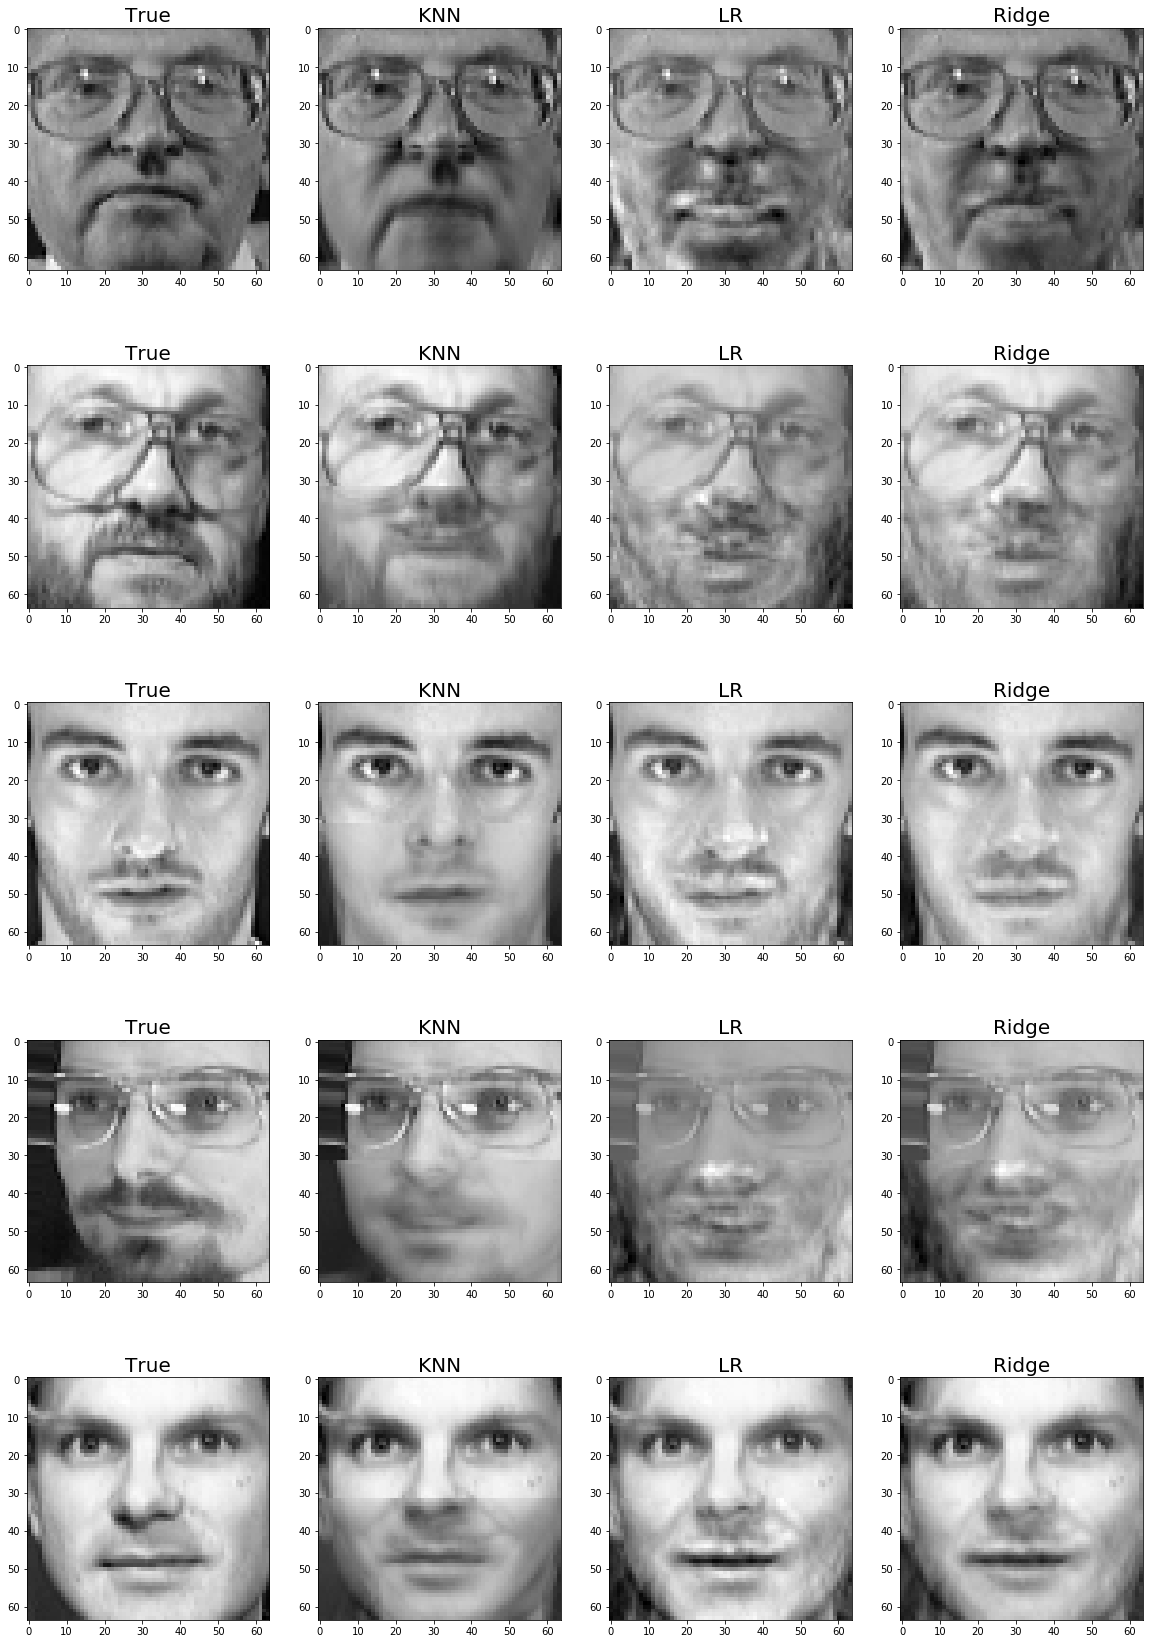

In [45]:
plt.figure(figsize=(20, 30))

model_data = {'True':top_faces_bottom_true,
             'KNN':top_faces_bottom_knn,
             'LR':top_faces_bottom_lr,
             'Ridge':top_faces_bottom_ridge}

index = 1
for i in range(5):
    # 读取真实的和各模型预测的下半部分脸数据
    for key, data in model_data.items():
        ax = plt.subplot(5, 4, index)
        # 拼成一个完整的脸
        full_face = np.concatenate((top_faces[i], data[i]))
        
        plt.imshow(full_face.reshape(64, 64), cmap='gray')
        ax.set_title(f'{key}', fontdict={'fontsize': 20})
        
        index += 1
plt.show()